<a href="https://colab.research.google.com/github/aburto22/auvergne-temperature/blob/main/Temperatures_Auvergne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [150]:
df_mean = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/tas_timeseries_monthly_cru_1901-2020_FRA_1250.csv',
                 skiprows=3,
                 index_col=0)
df_mean.index.name = 'Year'

In [151]:
df_max = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/tasmax_timeseries_monthly_cru_1901-2020_FRA_1250.csv',
                 skiprows=3,
                 index_col=0)
df_max.index.name = 'Year'

In [152]:
df_min = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/tasmin_timeseries_monthly_cru_1901-2020_FRA_1250.csv',
                 skiprows=3,
                 index_col=0)
df_min.index.name = 'Year'

Text(0.5, 0.98, 'Temperature trend per month in Auvergne, France')

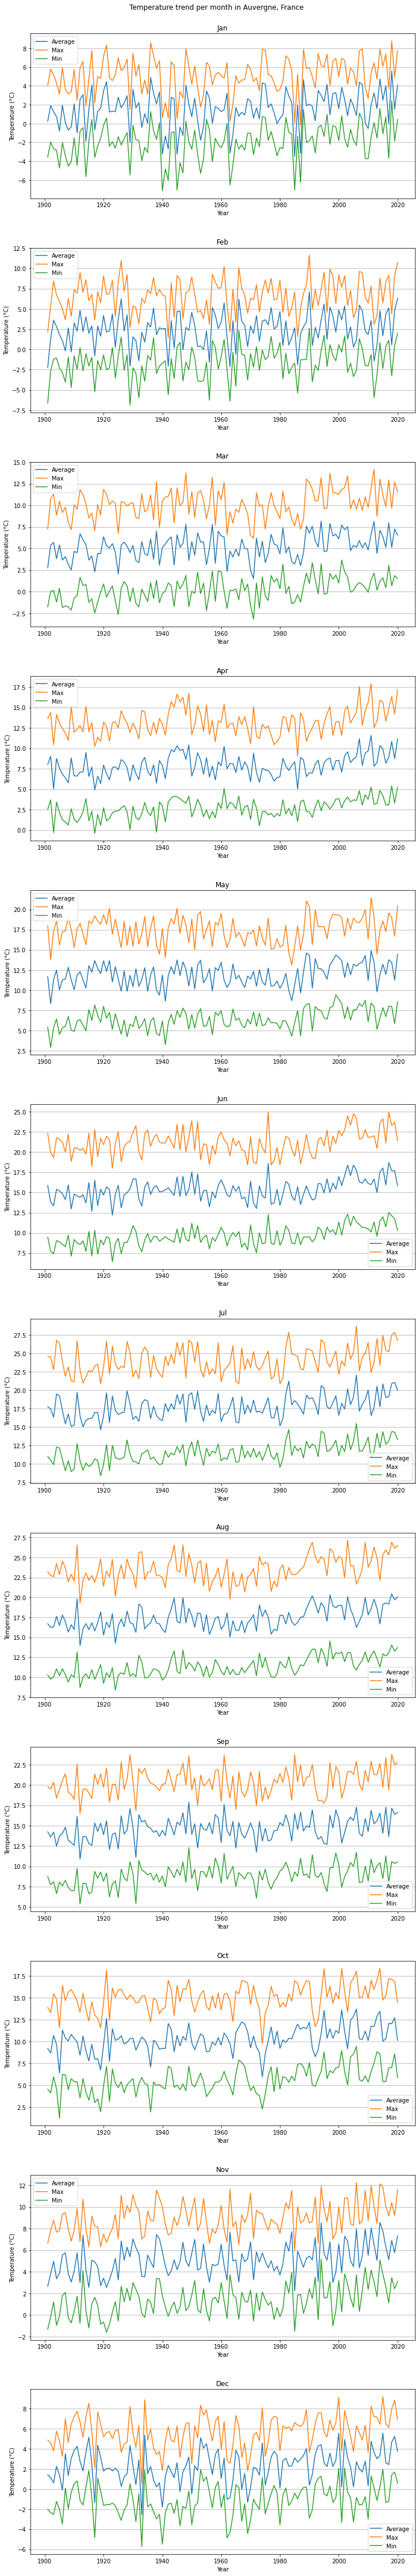

In [153]:
fig, axes = plt.subplots(12, 1, figsize=(12, 72))
fig.subplots_adjust(hspace=0.3, top=0.97)

for i in range(12):
  df_mean.iloc[:, i].plot(ax=axes[i])
  df_max.iloc[:, i].plot(ax=axes[i])
  df_min.iloc[:, i].plot(ax=axes[i])
  axes[i].set_ylabel('Temperature (°C)')
  axes[i].set_title(df_max.iloc[:, i].name)
  axes[i].grid(True, axis='y')
  axes[i].legend(['Average', 'Max', 'Min'])

fig.suptitle('Temperature trend per month in Auvergne, France')

In [154]:
df_year_mean = df_mean.reset_index().melt(id_vars='Year').groupby('Year').mean()
df_year_max = df_max.reset_index().melt(id_vars='Year').groupby('Year').mean()
df_year_min = df_min.reset_index().melt(id_vars='Year').groupby('Year').mean()

Text(0.5, 1.0, 'Temperature trend in Auvergne - France')

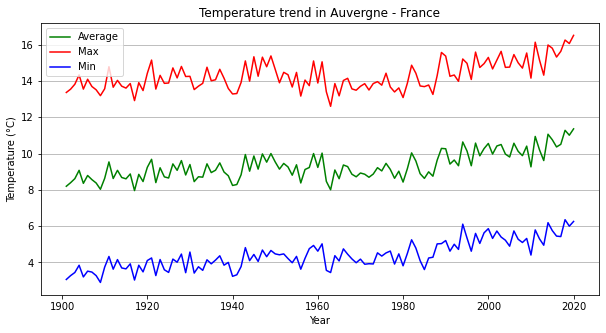

In [155]:
fig, ax = plt.subplots(figsize=(10, 5))

df_year_mean.plot(c='g', ax=ax)
df_year_max.plot(c='r', ax=ax)
df_year_min.plot(c='b', ax=ax)
ax.grid(True, axis='y')
ax.legend(['Average', 'Max', 'Min'])
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature trend in Auvergne - France')

In [156]:
df_pred = df_year_mean.reset_index()
df_pred = df_pred.loc[df_pred['Year'] >= 1960]
pred = stats.linregress(df_pred)

Text(0.5, 1.0, 'Temperature prediction for Auvergne, France. R = 0.7858840992022322')

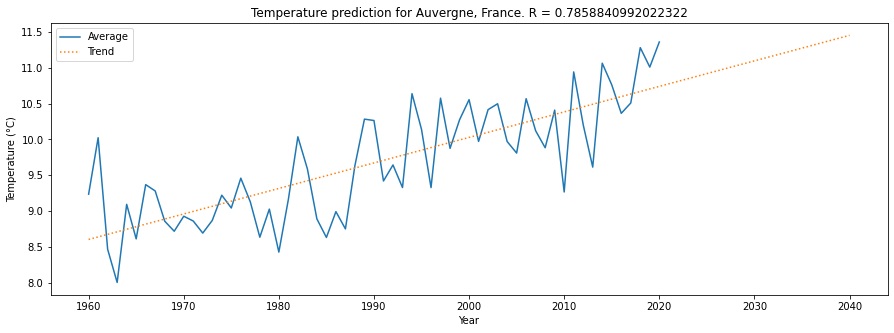

In [157]:
fig, ax = plt.subplots(figsize=(15, 5))

df_pred.plot(x='Year', y='value', ax=ax)

x = range(1960, 2041)
ax.plot(x, pred.slope * x + pred.intercept, lineStyle=':')
ax.legend(['Average', 'Trend'])
ax.set_ylabel('Temperature (°C)')
ax.set_title(f'Temperature prediction for Auvergne, France. R = {pred.rvalue}')

In [158]:
temp_real_2020 = df_pred.loc[df_pred['Year'] == 2020, 'value'].iloc[0]
temp_pred_2020 = pred.slope * 2020 + pred.intercept
temp_pred_2040 = pred.slope * 2040 + pred.intercept

print('Average temperature 2020 (real):', f'{temp_real_2020:.2f} °C')
print('Average temperature 2020 (prediction):', f'{temp_pred_2020:.2f} °C')
print('Average temperature 2040 (prediction):', f'{temp_pred_2040:.2f} °C')
print('Predicted increase in temperature:', f'{temp_pred_2040 - temp_pred_2020:.2f} °C')


Average temperature 2020 (real): 11.36 °C
Average temperature 2020 (prediction): 10.74 °C
Average temperature 2040 (prediction): 11.45 °C
Predicted increase in temperature: 0.71 °C
